In [27]:
import requests
import os
import pandas as pd
# import geopandas as gpd 
import matplotlib.pyplot as plt
import numpy as np

from cities.utils.cleaning_utils import find_repo_root
import requests
import json

root = find_repo_root()

In [24]:
# scrape the data from BLS.GOV
# Note, it seems to slow down as I run it, may be a rate limit
base_url = "https://www.bls.gov/lau/"
year_range = range(1990, 2023)
for yeari in year_range:
    # turn year into string
    year = str(yeari)
    url = base_url + "laucnty" + year[2:4] + ".xlsx"
    print(url)

    # Fetch the content using requests and a modified user-agent
    headers = {
        "User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0"
    }
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Raise an exception for HTTP errors

    # Read the content into a pandas DataFrame
    with open("temp_file.xlsx", "wb") as f:
        f.write(response.content)
    df = pd.read_excel("temp_file.xlsx")


    ### UNEMPLOYMENT RATE
    # extract data, rename columns, and remove first 5 rows
    df_extracted_unemp_rate = df[['Unnamed: 1','Unnamed: 2','Unnamed: 3', 'Unnamed: 9']][5:].rename(columns={'Unnamed: 1': 'stateFIPS', 'Unnamed: 2':'countyFIPS', 'Unnamed: 3':'GeoName', 'Unnamed: 9':year})
    # combine state and county FIPS
    df_extracted_unemp_rate['GeoFIPS'] = df_extracted_unemp_rate['stateFIPS'].astype(str).str.zfill(2) + df_extracted_unemp_rate['countyFIPS'].astype(str).str.zfill(3)
    # reorder columns
    df_extracted_unemp_rate = df_extracted_unemp_rate[['GeoFIPS', 'GeoName', year]]
    # replace N.A. with nan
    df_extracted_unemp_rate = df_extracted_unemp_rate.replace('N.A.', np.nan)
    # if first year in range
    if yeari == year_range[0]:
        df_all_unemp_rate = df_extracted_unemp_rate
    else:
        df_all_unemp_rate = pd.merge(df_all_unemp_rate, df_extracted_unemp_rate, on=['GeoFIPS', 'GeoName'], how='outer')
        # drop nan rows
        df_all_unemp_rate = df_all_unemp_rate.dropna()

    ### WORKFORCE SIZE
    # extract data, rename columns, and remove first 5 rows
    df_extracted_workforce_size = df[['Unnamed: 1','Unnamed: 2','Unnamed: 3', 'Unnamed: 6']][5:].rename(columns={'Unnamed: 1': 'stateFIPS', 'Unnamed: 2':'countyFIPS', 'Unnamed: 3':'GeoName', 'Unnamed: 6':year})
    # combine state and county FIPS
    df_extracted_workforce_size['GeoFIPS'] = df_extracted_workforce_size['stateFIPS'].astype(str).str.zfill(2) + df_extracted_workforce_size['countyFIPS'].astype(str).str.zfill(3)
    # reorder columns
    df_extracted_workforce_size = df_extracted_workforce_size[['GeoFIPS', 'GeoName', year]]
    # replace N.A. with nan
    df_extracted_workforce_size = df_extracted_workforce_size.replace('N.A.', np.nan)
    # if first year in range
    if yeari == year_range[0]:
        df_all_workforce_size = df_extracted_workforce_size
    else:
        df_all_workforce_size = pd.merge(df_all_workforce_size, df_extracted_workforce_size, on=['GeoFIPS', 'GeoName'], how='outer')
        # drop nan rows
        df_all_workforce_size = df_all_workforce_size.dropna()
        
    
df_all_workforce_size

https://www.bls.gov/lau/laucnty90.xlsx


/var/folders/b6/yxvwzrjx5mlgxfckqfcn8tv40000gn/T/ipykernel_14186/2621049452.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_unemp_rate = df_all_unemp_rate.applymap(lambda x: np.nan if x == 'N.A.' else x)
/var/folders/b6/yxvwzrjx5mlgxfckqfcn8tv40000gn/T/ipykernel_14186/2621049452.py:53: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_unemp_rate = df_all_unemp_rate.applymap(lambda x: np.nan if x == 'N.A.' else x)


https://www.bls.gov/lau/laucnty91.xlsx
https://www.bls.gov/lau/laucnty92.xlsx
https://www.bls.gov/lau/laucnty93.xlsx
https://www.bls.gov/lau/laucnty94.xlsx
https://www.bls.gov/lau/laucnty95.xlsx
https://www.bls.gov/lau/laucnty96.xlsx
https://www.bls.gov/lau/laucnty97.xlsx
https://www.bls.gov/lau/laucnty98.xlsx
https://www.bls.gov/lau/laucnty99.xlsx
https://www.bls.gov/lau/laucnty00.xlsx
https://www.bls.gov/lau/laucnty01.xlsx
https://www.bls.gov/lau/laucnty02.xlsx
https://www.bls.gov/lau/laucnty03.xlsx
https://www.bls.gov/lau/laucnty04.xlsx
https://www.bls.gov/lau/laucnty05.xlsx
https://www.bls.gov/lau/laucnty06.xlsx
https://www.bls.gov/lau/laucnty07.xlsx
https://www.bls.gov/lau/laucnty08.xlsx
https://www.bls.gov/lau/laucnty09.xlsx
https://www.bls.gov/lau/laucnty10.xlsx
https://www.bls.gov/lau/laucnty11.xlsx
https://www.bls.gov/lau/laucnty12.xlsx
https://www.bls.gov/lau/laucnty13.xlsx
https://www.bls.gov/lau/laucnty14.xlsx
https://www.bls.gov/lau/laucnty15.xlsx
https://www.bls.gov/lau/l

,GeoFIPS,GeoName,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,01001,"Autauga County, AL",16936,16958,17629,18170,18885,19632,20263,21087,...,25783,25639,25541,25710,26269,26471,26696,26425,26545,26789
1,01003,"Baldwin County, AL",46896,49521,52129,54891,58092,60795,63985,67122,...,85206,86546,87493,89778,93152,96235,98965,98979,99953,102849
2,01005,"Barbour County, AL",11510,11649,11592,11953,12144,12346,12515,12473,...,9096,8859,8590,8334,8415,8505,8641,8684,8280,8241
3,01007,"Bibb County, AL",7449,7529,7976,7700,7748,7987,7888,8032,...,8699,8573,8552,8539,8648,8697,8777,8717,8641,8726
4,01009,"Blount County, AL",19196,19166,19522,19862,20334,20985,21685,22676,...,24860,24571,24416,24380,25009,25333,25592,25136,25377,25796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,72145,"Vega Baja Municipio, PR",16876,17476,17593,17431,17994,18558,19157,20133,...,14601,14157,13820,13733,13414,13159,13174,N.A.,14172,14232
3208,72147,"Vieques Municipio, PR",2477,2588,2784,2658,2503,2512,2566,2675,...,3080,3152,3194,3260,3027,2726,2551,N.A.,2804,2742
3209,72149,"Villalba Municipio, PR",5870,5986,6294,6633,6115,6042,6203,6207,...,8184,7920,7802,7815,7557,7335,7494,N.A.,7697,7790
3210,72151,"Yabucoa Municipio, PR",10532,10995,11105,11136,11459,11825,12231,12897,...,10169,9642,9198,9081,9000,8791,8841,N.A.,9156,9278


In [25]:
# save in data/raw
# make sure GeoFIPS is a string, to keep the leading 0's
df_all_unemp_rate['GeoFIPS'] = df_all_unemp_rate['GeoFIPS'].astype(str)
df_all_workforce_size['GeoFIPS'] = df_all_workforce_size['GeoFIPS'].astype(str)
df_all_unemp_rate.to_csv('../../data/raw/unemployment_rate_wide_withNA.csv', index=False)
df_all_workforce_size.to_csv('../../data/raw/workforce_size_wide_withNA.csv', index=False)

# save in data/processed, but first remove rows that have non numerical values after the first 2 columns
df_all_unemp_rate_clean = df_all_unemp_rate[df_all_unemp_rate.iloc[:,2:].apply(lambda x: pd.to_numeric(x, errors='coerce').notnull().all(), axis=1)]
df_all_unemp_rate_clean.to_csv('../../data/processed/unemployment_rate_wide.csv', index=False)
df_all_workforce_size_clean = df_all_workforce_size[df_all_workforce_size.iloc[:,2:].apply(lambda x: pd.to_numeric(x, errors='coerce').notnull().all(), axis=1)]
df_all_workforce_size_clean.to_csv('../../data/processed/workforce_size_wide.csv', index=False)

In [18]:
# remove temp file
os.remove("temp_file.xlsx")

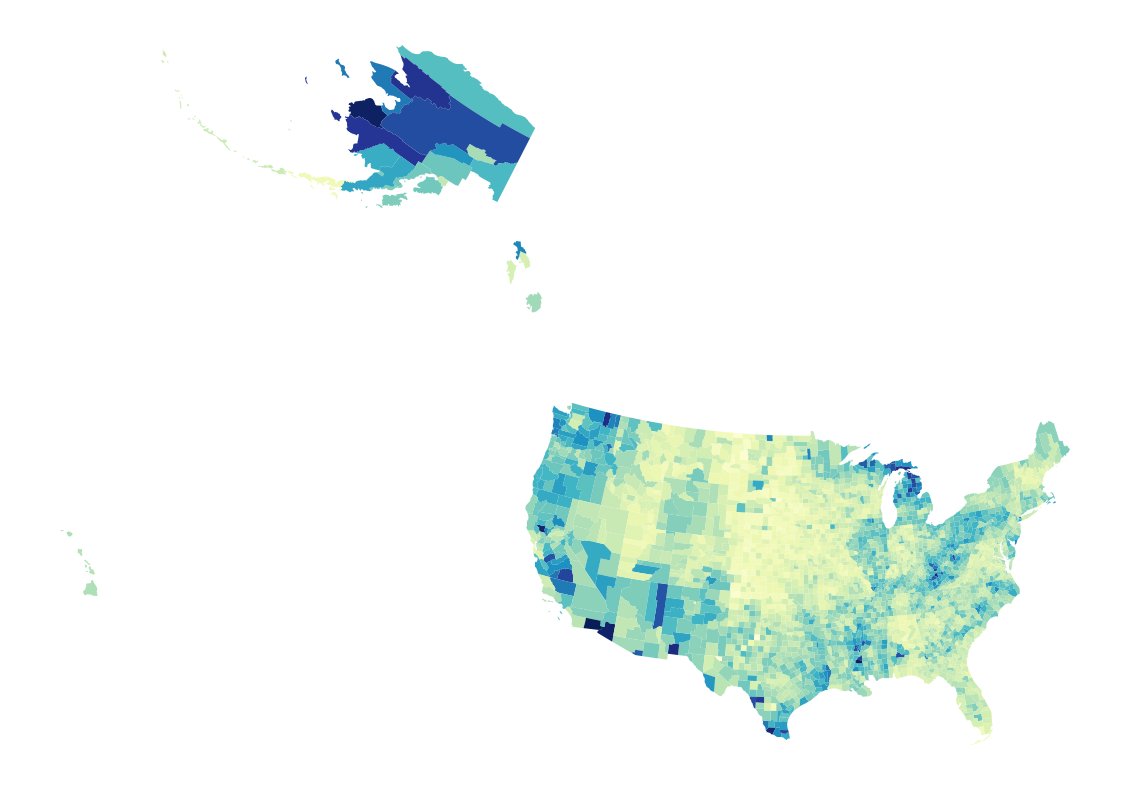

In [9]:
# plot on a map using FIPS codes to make sure it looks right
# load csv
# df_all_unemp_rate_clean = pd.read_csv('../../data/processed/unemployment_rate_wide.csv')

# read in shapefile
# Load the U.S. counties shapefile (this includes FIPS codes)
url = "https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_20m.zip"
counties = gpd.read_file(url)

A = counties[['GEOID', 'geometry']]
B = df_all_unemp_rate_clean
merged = pd.merge(A, B, left_on='GEOID', right_on='GeoFIPS', how='left')

# Set the projection for the contiguous US using Albers Equal Area
merged = merged.to_crs(epsg=5070)

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))

merged.plot(column='2022', 
            ax=ax, 
            legend=True, 
            cmap='YlGnBu', # 'OrRd', 'YlGnBu'
            linewidth=0.1)

ax.set_axis_off()
# remove legend
ax.get_legend().remove()


plt.show()

Unemployment rate for Metropolitan Statistical Areas (MSAs) in the United States, 1990-2022

In [28]:
def download_unemployment_data(features_list: list, year_range: list): # both should be list of strings, years: end and start value


    key = 'fba46033fa034476842eadf11f356142'
    headers = {'Content-type': 'application/json'}

    data = json.dumps({"seriesid": features_list,"startyear":year_range[0], # unemployment rate, NOT seasonally adjusted
                        "endyear": year_range[1], "registrationkey":f"{key}"})
    p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/',
                    data=data, headers=headers)

    json_data = json.loads(p.text)

    series_data_list = json_data['Results']['series']

    dfs = []

    for series_data in series_data_list:
        series_id = series_data['seriesID']
        data = series_data['data']

        df = pd.DataFrame(data)
        df['metro'] = series_id

        dfs.append(df)

    final_df = pd.concat(dfs, ignore_index=True)


    final_df['value'] = final_df['value'].astype(float) # wrangling the output
    new_df = final_df.groupby(['year', 'metro'])['value'].mean().reset_index()
    new_df['GeoFIPS'] = new_df['metro'].str[7:12]
    new_df = new_df.drop(columns=['metro'])
    return new_df



In [29]:
metro_areas = pd.read_csv(f"{root}/data/raw/metrolist.csv")
metro_areas.head(2)

,GeoFIPS,GeoName,CountyFIPS,CountyName
0,10180,"Abilene, TX (MA)",48059,"Callahan, TX"
1,10180,"Abilene, TX (MA)",48253,"Jones, TX"


In [31]:
# using MSA fips codes to create a list of codes indentifiable by the BLS API
# LAUMT is a survey name; first two digits are state fips, next 5 are MSA fips, last represent data specification

metro_areas['CountyStateFIPS'] = metro_areas['CountyFIPS'].astype(str).str.zfill(5)
metro_areas['combined'] = metro_areas.apply(lambda row: str(row['CountyStateFIPS'])[:2] + str(row['GeoFIPS']), axis=1)
metro_state_fips = metro_areas[['combined']].drop_duplicates().reset_index(drop=True)
combined_list = metro_state_fips['combined'].tolist()
combined_list = ['LAUMT' + x + '00000003' for x in combined_list]
combined_list[0]

'LAUMT481018000000003'

In [ ]:
# Wathch out, the process takes around 24 minutes

output_df = pd.DataFrame()
features = combined_list.copy()
year_range_pairs = [('1990', '1999'), ('2000', '2009'), ('2010', '2019'), ('2020', '2022')]


for start_year, end_year in year_range_pairs:

    for i in range(0, len(features), 30):
       
        sublist = features[i:i+30]
        df = download_unemployment_data(sublist, [start_year, end_year])
        output_df = pd.concat([output_df, df], ignore_index=True)


In [21]:
output_df['GeoFIPS'].nunique() # 366 FIPS (should be 384)

366

In [24]:
output_df.head()

,year,value,GeoFIPS
0,1990,7.191667,11500
1,1990,6.125000,12220
2,1990,6.158333,11260
3,1990,10.875000,12540
4,1990,7.100000,10500


In [ ]:
output_df.to_csv(f"{root}/data/raw/unemployment_rate_ma.csv", index=False)